# Methods

## Import and process the MNIST dataset

##Statement of responsibilities
Both Karen and Emily came up with the idea. Emily found various tutorial notebooks with sample code for Convolutional Neural Network model. Karen created the blurry and Emily created the noisy datasets used to test the model. Both Karen and Emily analyzed the data, and both wrote the Methods. Karen and Emily wrote the Introduction, Results and Discussion sections independently.

##Software
-	Colaboratory a free Jupyter notebook environment powered by google using python as the programming language was used to create, train, and test each model. MNIST dataset a set of large labeled hand-written numbers was used to train and test the model. Keras, a python Deep Learning library was used to create both models.

**1. Import the necessary Python libraries**

First, we import the necessary packages for creating the models, visualizing the data, and visualizing the performace of the models.

In [ ]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

**2. Import the MNIST dataset**

Load the mnist pre-shuffled train data and test data. This returns 2 tuples: train_images, test_images: uint8 array of grayscale image data with shape (num_samples, 28, 28), and train_labels, test_labels: uint8 array of digit labels (integers in range 0-9) with shape (num_samples,). We also create a list of labels for the dataset. These are the NumPy arrays we will use to train and then test the models.

In [ ]:
mnist = keras.datasets.mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

class_names = ['Zero', 'One', 'Two', 'Three', 'Four', 
               'Five', 'Six', 'Seven', 'Eight', 'Nine']

11493376/11490434 [==============================] - 0s 0us/step


**3. Visualize a subset of the dataset**

We visualize subsets of the dataset to see how the MNIST data look in the test and training sets.

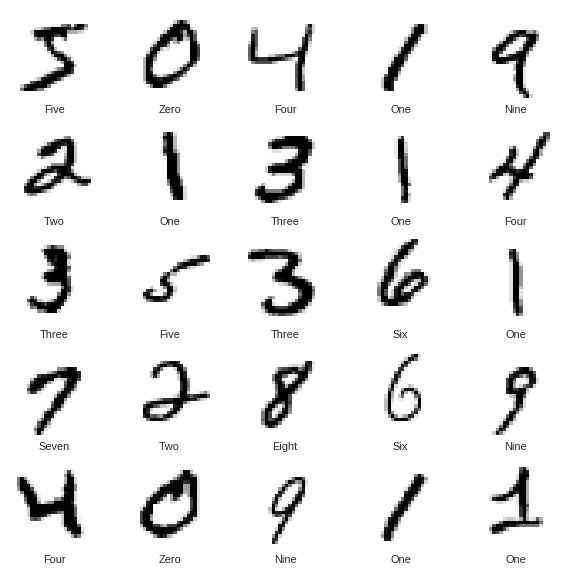

In [ ]:
## plot a portion of the training set
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

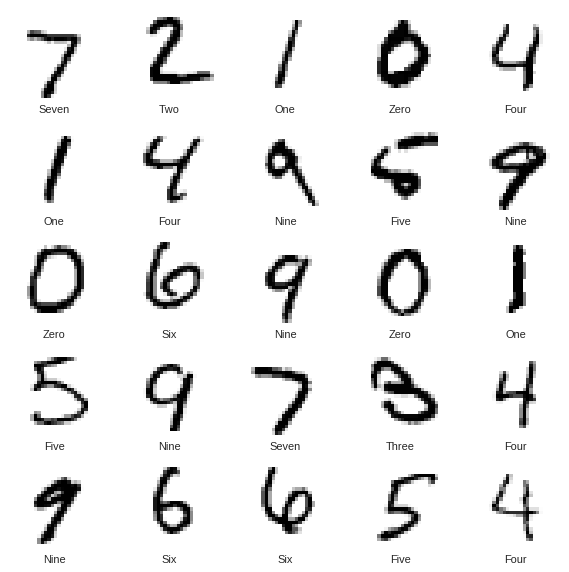

In [ ]:
## plot a portion of the test set
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[test_labels[i]])

We checked that the training and test datasets had approximately equal numbers of samples from each classification category : numbers 0-9

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


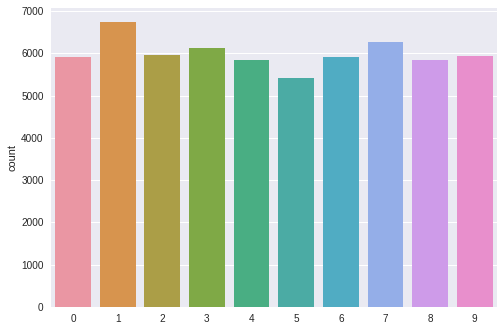

In [ ]:
# train data
plot = sns.countplot(train_labels)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


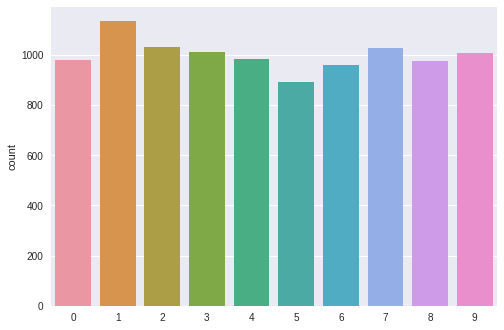

In [ ]:
# test data
plot = sns.countplot(test_labels)

**4. Preprocess the data**

We preprocessed the training and test images by normalizing their values to between zero and one. This optimizes execution time.

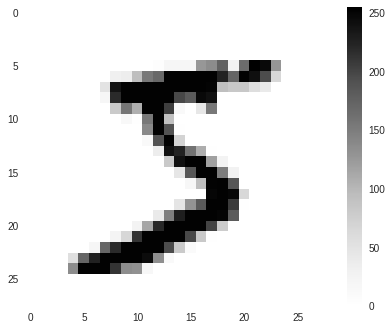

In [ ]:
# visualize the pixel values before normalization
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)

In [ ]:
# save a copy of the unprocessed data
train_images_unprocessed = train_images.copy()
test_images_unprocessed = test_images.copy()

# normalize the data
train_images = train_images / 255.0
test_images = test_images / 255.0

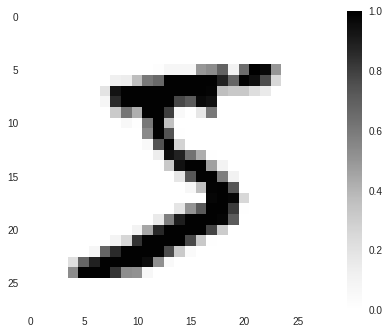

In [ ]:
# visualize the pixel values after normalization
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)

**5. Create noisy versions of the dataset on which to test the models**

We created two versions of the dataset that have been manipulated to create advesarial noise. These datasets were then used to test model accuracy: blurred and added noise. Within each of these sets, we create three different levels of manipulation on which to test the models.

The noisy dataset was manipulated to change thevalue of each pixel to a random number between 0 and 1.

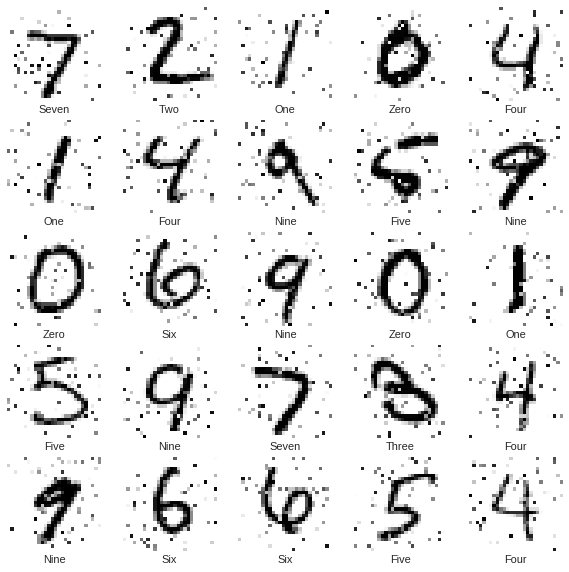

In [ ]:
# create the noisy data

# this set of data has a noise level of 1
test_images_noise1 = test_images.copy()

for index in range(10000): 
  #loop over pixels for one test image and make it noisy
  for pixels in range(50): #this range is the number of pixels that will be changed
    #location of the pixel
    x_gray = np.random.randint(0, 28)
    y_gray = np.random.randint(0, 28)

    #gray value of the pixel
    gray_value = np.random.random_sample()

    #change the pixel
    test_images_noise1[index][x_gray,y_gray] = gray_value


# view a subset of the level 1 noise data
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images_noise1[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[test_labels[i]])

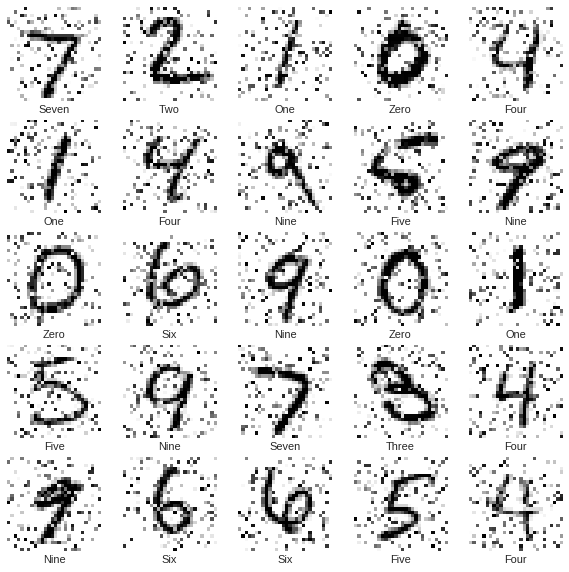

In [ ]:
# this set of data has a noise level of 2
test_images_noise2 = test_images.copy()

for index in range(10000): 
  #loop over pixels for one test image and make it noisy
  for pixels in range(150): #this range is the number of pixels that will be changed
    #location of the pixel
    x_gray = np.random.randint(0, 28)
    y_gray = np.random.randint(0, 28)

    #gray value of the pixel
    gray_value = np.random.random_sample()

    #change the pixel
    test_images_noise2[index][x_gray,y_gray] = gray_value


# view a subset of the level 2 noise data
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images_noise2[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[test_labels[i]])

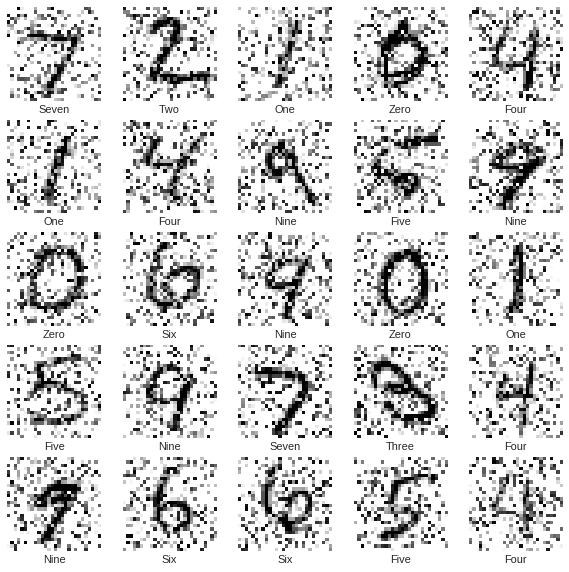

In [ ]:
# this set of data has a noise level of 3
# this set of data has a noise level of 2
test_images_noise3 = test_images.copy()

for index in range(10000): 
  #loop over pixels for one test image and make it noisy
  for pixels in range(300): #this range is the number of pixels that will be changed
    #location of the pixel
    x_gray = np.random.randint(0, 28)
    y_gray = np.random.randint(0, 28)

    #gray value of the pixel
    gray_value = np.random.random_sample()

    #change the pixel
    test_images_noise3[index][x_gray,y_gray] = gray_value


# view a subset of the level 3 noise data
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images_noise3[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[test_labels[i]])

The blurry data was created by applying a Gaussian blur over the data. The Gaussian filter is a non-uniform low pass spatial filter. It takes the weights of all pixels are normalizes on a bell shaped distribution. Gaussian filters are usually used to blur images and remove noise and detail. Increasing the standard deviation of the distribution increases the degree of the blur. 
This type of filter is often used to describe certain aspects of the visual system since it has been found that neurons create a similar filter when processing visual images.  

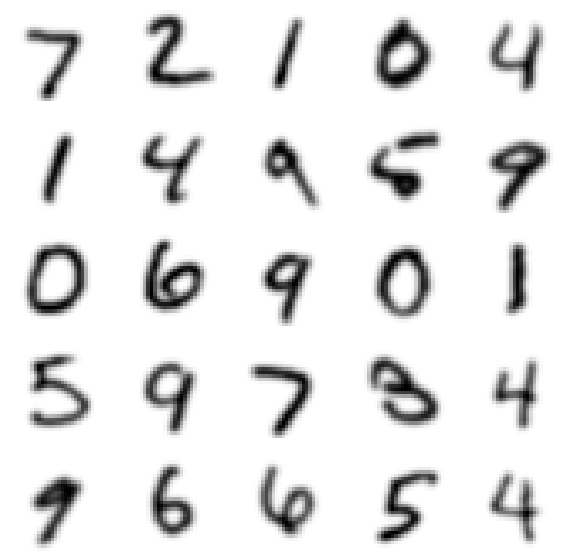

In [ ]:
from scipy.ndimage.filters import gaussian_filter

# create the blurred data

# this set of data has a blur level of 1
test_images_blur1 = test_images_unprocessed.copy()
for i in range(10000):
    test_images_blur1[i] = gaussian_filter(test_images_unprocessed[i], sigma=1.0)

#normalize the blurred data
test_images_blur1 = test_images_blur1 / 255.0

# view a subset of the level 1 blur data
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images_blur1[i], cmap=plt.cm.binary)

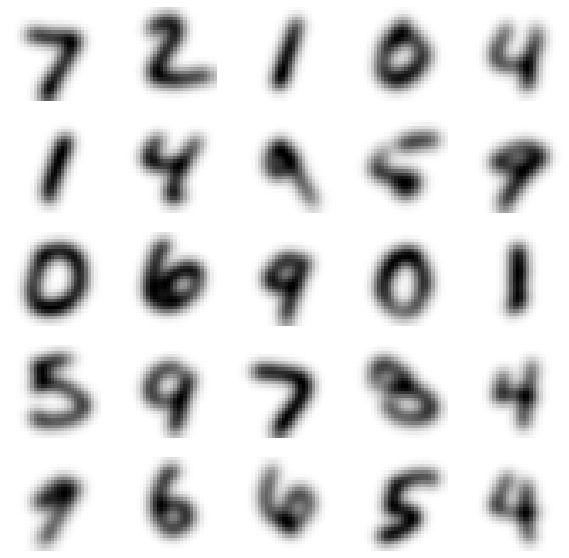

In [ ]:
# this set of data has a blur level of 2
test_images_blur2 = test_images_unprocessed.copy()
for i in range(10000):
    test_images_blur2[i] = gaussian_filter(test_images_unprocessed[i], sigma=2.0)

#normalize the blurred data
test_images_blur2 = test_images_blur2 / 255.0

# view a subset of the level 2 blur data
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images_blur2[i], cmap=plt.cm.binary)

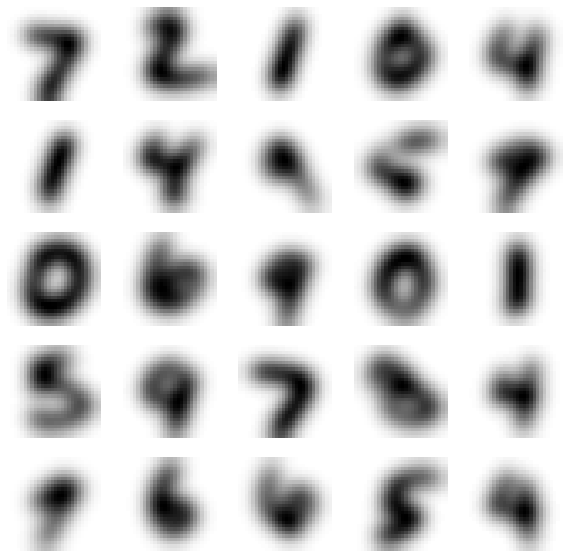

In [ ]:
# this set of data has a blur level of 3
test_images_blur3 = test_images_unprocessed.copy()
for i in range(10000):
    test_images_blur3[i] = gaussian_filter(test_images_unprocessed[i], sigma=3.0)

#normalize the blurred data
test_images_blur3 = test_images_blur3 / 255.0

# view a subset of the level 3 blur data
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images_blur3[i], cmap=plt.cm.binary)

## Create and train the models

We create and train three different models with different architectures to compare their performance on the regular and noisy MNIST data.

**1. Create and train a simple convolutional neural net (model 1)**

We first create a simple convolutional neural network model with one flatten layer and 2 dense layers, then train this model on the MNIST training dataset. 

- For model 1, we do not use any kind of pooling layer. We used a reLu activation function in one of the dense layer. A softmax function was used in the other dense layer. The reLu function converts all negative numbers to 0. The softmax function squashes the outputs of each unit to be between 0 and 1, and divides the output. 

In [ ]:
model1 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
    ])

# Take a look at the model summary
model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# compile model 1
model1.compile(optimizer=tf.train.AdamOptimizer(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
#train model 1
model1.fit(train_images, train_labels, epochs=10, batch_size=64)

Epoch 1/10
60000/60000 [==============================] - 5s 87us/step - loss: 0.3053 - acc: 0.9142
Epoch 2/10
60000/60000 [==============================] - 3s 55us/step - loss: 0.1381 - acc: 0.9603
Epoch 3/10
60000/60000 [==============================] - 3s 55us/step - loss: 0.0964 - acc: 0.9721
Epoch 4/10
60000/60000 [==============================] - 3s 56us/step - loss: 0.0728 - acc: 0.9783
Epoch 5/10
60000/60000 [==============================] - 3s 55us/step - loss: 0.0575 - acc: 0.9827
Epoch 6/10
60000/60000 [==============================] - 3s 56us/step - loss: 0.0472 - acc: 0.9856
Epoch 7/10
60000/60000 [==============================] - 3s 56us/step - loss: 0.0377 - acc: 0.9886
Epoch 8/10
60000/60000 [==============================] - 3s 55us/step - loss: 0.0300 - acc: 0.9911
Epoch 9/10
60000/60000 [==============================] - 3s 54us/step - loss: 0.0247 - acc: 0.9929
Epoch 10/10
60000/60000 [==============================] - 3s 55us/step - loss: 0.0201 - acc: 0.9946

**2. Create a more complex model (model 2)**

This model is comprised of additional layers. 

In [ ]:
model2 = tf.keras.Sequential()

model2.add(tf.keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28,28,1))) 
model2.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model2.add(tf.keras.layers.Dropout(0.3))

model2.add(tf.keras.layers.Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model2.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model2.add(tf.keras.layers.Dropout(0.3))

model2.add(tf.keras.layers.Flatten())
model2.add(tf.keras.layers.Dense(256, activation='relu'))
model2.add(tf.keras.layers.Dropout(0.5))
model2.add(tf.keras.layers.Dense(10, activation='softmax'))

# Take a look at the model summary
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 64)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        8224      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1568)              0         
__________

In [ ]:
# compile model 2
model2.compile(optimizer=tf.train.AdamOptimizer(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
#train model 2

# reshape data for this model as it expects an additional dimension
train_images_reshaped = train_images.copy()
train_images_reshaped = train_images_reshaped.reshape(train_images_reshaped.shape[0], 28, 28, 1)

# reshape the testing images as well
test_images_reshaped = test_images.copy()
test_images_reshaped = test_images_reshaped.reshape(test_images_reshaped.shape[0], 28, 28, 1)

# train with reshaped data
model2.fit(train_images_reshaped, train_labels, epochs=10, batch_size=64)

Epoch 1/10
60000/60000 [==============================] - 10s 163us/step - loss: 0.3269 - acc: 0.8962
Epoch 2/10
60000/60000 [==============================] - 7s 121us/step - loss: 0.1272 - acc: 0.9608
Epoch 3/10
60000/60000 [==============================] - 7s 121us/step - loss: 0.0978 - acc: 0.9697
Epoch 4/10
60000/60000 [==============================] - 7s 121us/step - loss: 0.0790 - acc: 0.9752
Epoch 5/10
60000/60000 [==============================] - 7s 122us/step - loss: 0.0708 - acc: 0.9778
Epoch 6/10
60000/60000 [==============================] - 7s 122us/step - loss: 0.0637 - acc: 0.9804
Epoch 7/10
60000/60000 [==============================] - 7s 122us/step - loss: 0.0586 - acc: 0.9816
Epoch 8/10
60000/60000 [==============================] - 7s 121us/step - loss: 0.0562 - acc: 0.9824
Epoch 9/10
60000/60000 [==============================] - 7s 122us/step - loss: 0.0538 - acc: 0.9829
Epoch 10/10
60000/60000 [==============================] - 7s 121us/step - loss: 0.0506 - 

**3. Create a second more complex model (model 3)**

In [ ]:
model3 = tf.keras.Sequential()

model3.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(5,5),padding ='same', activation='relu', input_shape=(28,28,1))) #may need to change to kernel_size=5 syntax
model3.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(5,5),padding ='same', activation='relu'))
model3.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
model3.add(tf.keras.layers.Dropout(0.25))

model3.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3),padding = 'same', activation ='relu'))
model3.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3),padding = 'same', activation ='relu'))
model3.add(tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2)))
model3.add(tf.keras.layers.Dropout(0.25))

model3.add(tf.keras.layers.Flatten())
model3.add(tf.keras.layers.Dense(256, activation = "relu"))
model3.add(tf.keras.layers.Dropout(0.5))
model3.add(tf.keras.layers.Dense(10, activation = "softmax"))

# Take a look at the model summary
model3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 32)        25632     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 7, 7, 64)          0         
__________

In [ ]:
# compile model 3
model3.compile(optimizer=tf.train.AdamOptimizer(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# train model 3

# train with reshaped data
model3.fit(train_images_reshaped, train_labels, epochs=10, batch_size=64)

Epoch 1/10
60000/60000 [==============================] - 12s 199us/step - loss: 0.1913 - acc: 0.9395
Epoch 2/10
60000/60000 [==============================] - 11s 190us/step - loss: 0.0645 - acc: 0.9803
Epoch 3/10
60000/60000 [==============================] - 11s 188us/step - loss: 0.0495 - acc: 0.9848
Epoch 4/10
60000/60000 [==============================] - 11s 188us/step - loss: 0.0391 - acc: 0.9880
Epoch 5/10
60000/60000 [==============================] - 11s 187us/step - loss: 0.0349 - acc: 0.9895
Epoch 6/10
60000/60000 [==============================] - 11s 188us/step - loss: 0.0313 - acc: 0.9903
Epoch 7/10
60000/60000 [==============================] - 11s 190us/step - loss: 0.0300 - acc: 0.9902
Epoch 8/10
60000/60000 [==============================] - 11s 191us/step - loss: 0.0262 - acc: 0.9922
Epoch 9/10
60000/60000 [==============================] - 11s 188us/step - loss: 0.0232 - acc: 0.9927
Epoch 10/10
60000/60000 [==============================] - 11s 188us/step - loss: 

# Results

Here, we test the accuracies of the different models on the regular, noisy, and blurred MNIST test data. Since the accuracy for model 2 and 3 was very close together model 2 was excluded from further testing with the adverserial noise datasets.

**1. Evaluate the accuracy of each model on the regular MNIST test images**

In [ ]:
# accuracies for model 1
test_loss, test_acc_model1_MNIST = model1.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc_model1_MNIST)

10000/10000 [==============================] - 1s 84us/step
Test accuracy: 0.9765


In [ ]:
# confusion matrix 

In [ ]:
# accuracy for model 2
test_loss, test_acc_model2_MNIST = model2.evaluate(test_images_reshaped, test_labels)

print('Test accuracy:', test_acc_model2_MNIST)

10000/10000 [==============================] - 1s 110us/step
Test accuracy: 0.9916


In [ ]:
# accuracy for model 3
test_loss, test_acc_model3_MNIST = model3.evaluate(test_images_reshaped, test_labels)

print('Test accuracy:', test_acc_model3_MNIST)

10000/10000 [==============================] - 1s 131us/step
Test accuracy: 0.9942


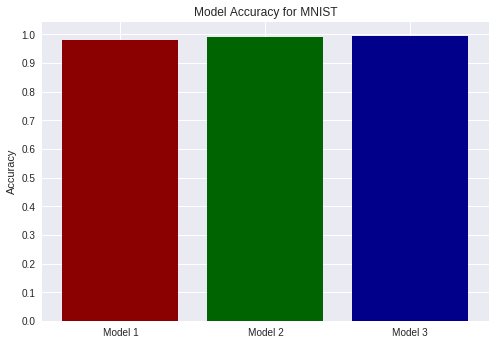

In [ ]:
# Plot accuracy of 3 models on MNIST test data

ind = np.arange(3)    # the x locations for the groups
width = 0.5       # the width of the bars: can also be len(x) sequence

accuracies = (test_acc_model1_MNIST, test_acc_model2_MNIST, test_acc_model3_MNIST)
plt.bar(ind, accuracies,color=['darkred', 'darkgreen', 'darkblue'])
plt.ylabel('Accuracy')
plt.title('Model Accuracy for MNIST')
plt.xticks(ind, ('Model 1', 'Model 2', 'Model 3'))
plt.yticks(np.arange(0, 1.10, 0.10))

plt.show()

**Figure 1.** Accuracy of simple and complex convolutional neural networks on the MNIST dataset.

**2. Evaluate the accuracy of the simple model (model 1) and more accurate complex model (model 3) on each level of noise data**

In [ ]:
# accuracies for model 1

# model 1 accuracy for noise level 1
test_loss, test_acc_model1_MNIST_noise1 = model1.evaluate(test_images_noise1, test_labels)

print('Test accuracy:', test_acc_model1_MNIST_noise1)

10000/10000 [==============================] - 1s 75us/step
Test accuracy: 0.9487


In [ ]:
# model 1 accuracy for noise level 2
test_loss, test_acc_model1_MNIST_noise2 = model1.evaluate(test_images_noise2, test_labels)

print('Test accuracy:', test_acc_model1_MNIST_noise2)

NameError: ignored

In [ ]:
#model 1 accuracy for noise level 3
test_loss, test_acc_model1_MNIST_noise3 = model1.evaluate(test_images_noise3, test_labels)

print('Test accuracy:', test_acc_model1_MNIST_noise3)

10000/10000 [==============================] - 1s 83us/step
Test accuracy: 0.4442


In [ ]:
# accuracies for model 3

# need to reshape the noise datasets for this model
test_images_noise1_reshaped = test_images_noise1.copy()
test_images_noise1_reshaped = test_images_noise1_reshaped.reshape(test_images_noise1_reshaped.shape[0], 28, 28, 1)


# model 3 accuracy for noise level 1 
test_loss, test_acc_model3_MNIST_noise1 = model3.evaluate(test_images_noise1_reshaped, test_labels)

print('Test accuracy:', test_acc_model3_MNIST_noise1)

10000/10000 [==============================] - 1s 137us/step
Test accuracy: 0.9902


In [ ]:
#model 3 accuracy for noise level 2

# need to reshape the noise datasets for this model
test_images_noise2_reshaped = test_images_noise2.copy()
test_images_noise2_reshaped = test_images_noise2_reshaped.reshape(test_images_noise2_reshaped.shape[0], 28, 28, 1)


# model 3 accuracy for noise level 1 
test_loss, test_acc_model3_MNIST_noise2 = model3.evaluate(test_images_noise2_reshaped, test_labels)

print('Test accuracy:', test_acc_model3_MNIST_noise2)

10000/10000 [==============================] - 1s 143us/step
Test accuracy: 0.9477


In [ ]:
# model 3 accuracy for noise level 3

# need to reshape the noise datasets for this model
test_images_noise3_reshaped = test_images_noise3.copy()
test_images_noise3_reshaped = test_images_noise3_reshaped.reshape(test_images_noise3_reshaped.shape[0], 28, 28, 1)

# model 3 accuracy for noise level 1 
test_loss, test_acc_model3_MNIST_noise3 = model3.evaluate(test_images_noise3_reshaped, test_labels)

print('Test accuracy:', test_acc_model3_MNIST_noise3)

10000/10000 [==============================] - 1s 140us/step
Test accuracy: 0.7888


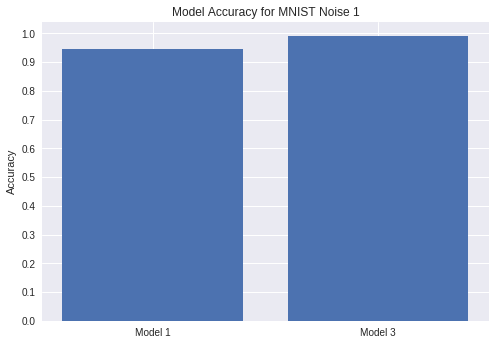

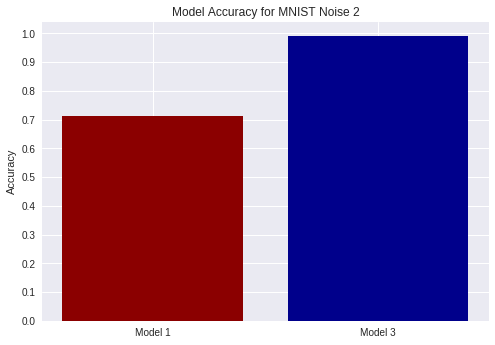

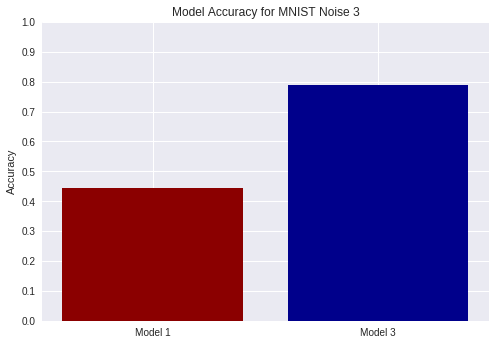

In [ ]:
# Plot accuracy of model 1 and model 3 on all levels of the noisy MNIST test data

# noise level 1
ind = np.arange(2)    # the x locations for the groups
width = 0.5       # the width of the bars: can also be len(x) sequence

accuracies = (test_acc_model1_MNIST_noise1, test_acc_model3_MNIST_noise1)
plt.bar(ind, accuracies,color=['darkred', 'darkblue'])
plt.ylabel('Accuracy')
plt.title('Model Accuracy for MNIST Noise 1')
plt.xticks(ind, ('Model 1', 'Model 3'))
plt.yticks(np.arange(0, 1.10, 0.10))

plt.show()

# noise level 2
ind = np.arange(2)    # the x locations for the groups
width = 0.5       # the width of the bars: can also be len(x) sequence

accuracies = (test_acc_model1_MNIST_noise2, test_acc_model3_MNIST_noise1)
plt.bar(ind, accuracies,color=['darkred', 'darkblue'])
plt.ylabel('Accuracy')
plt.title('Model Accuracy for MNIST Noise 2')
plt.xticks(ind, ('Model 1', 'Model 3'))
plt.yticks(np.arange(0, 1.10, 0.10))

plt.show()

# noise level 3
ind = np.arange(2)    # the x locations for the groups
width = 0.5       # the width of the bars: can also be len(x) sequence

accuracies = (test_acc_model1_MNIST_noise3, test_acc_model3_MNIST_noise3)
plt.bar(ind, accuracies,color=['darkred', 'darkblue'])
plt.ylabel('Accuracy')
plt.title('Model Accuracy for MNIST Noise 3')
plt.xticks(ind, ('Model 1', 'Model 3'))
plt.yticks(np.arange(0, 1.10, 0.10))

plt.show()

**Figure 2.** Accuracy of the simple and better complex model on noisy MNIST data. Top: noise level 1; Middle: noise level 2; Bottom: noise level 3.

**3. Evaluate the accuracy of the simple model (model 1) and more accurate complex model (model 3) on each level of blur data**

In [ ]:
# accuracies for model 1

# model 1 accuracy for blur level 1
test_loss, test_acc_model1_MNIST_blur1 = model1.evaluate(test_images_blur1, test_labels)

print('Test accuracy:', test_acc_model1_MNIST_blur1)

10000/10000 [==============================] - 1s 66us/step
Test accuracy: 0.9698


In [ ]:
# model 1 accuracy for blur level 2
test_loss, test_acc_model1_MNIST_blur2 = model1.evaluate(test_images_blur2, test_labels)

print('Test accuracy:', test_acc_model1_MNIST_blur2)

10000/10000 [==============================] - 1s 67us/step
Test accuracy: 0.8044


In [ ]:
# model 1 accuracy for blur level 3
test_loss, test_acc_model1_MNIST_blur3 = model1.evaluate(test_images_blur3, test_labels)

print('Test accuracy:', test_acc_model1_MNIST_blur3)

10000/10000 [==============================] - 1s 69us/step
Test accuracy: 0.4779


In [ ]:
# accuracies for model 3

# need to reshape the blur datasets for this model
test_images_blur1_reshaped = test_images_blur1.copy()
test_images_blur1_reshaped = test_images_blur1_reshaped.reshape(test_images_blur1_reshaped.shape[0], 28, 28, 1)


# model 3 accuracy for blur level 1 
test_loss, test_acc_model3_MNIST_blur1 = model3.evaluate(test_images_blur1_reshaped, test_labels)

print('Test accuracy:', test_acc_model3_MNIST_blur1)

10000/10000 [==============================] - 1s 134us/step
Test accuracy: 0.9858


In [ ]:
# need to reshape the blur datasets for this model
test_images_blur2_reshaped = test_images_blur2.copy()
test_images_blur2_reshaped = test_images_blur2_reshaped.reshape(test_images_blur2_reshaped.shape[0], 28, 28, 1)


# model 3 accuracy for blur level 2 
test_loss, test_acc_model3_MNIST_blur2 = model3.evaluate(test_images_blur2_reshaped, test_labels)

print('Test accuracy:', test_acc_model3_MNIST_blur2)

10000/10000 [==============================] - 1s 132us/step
Test accuracy: 0.5357


In [ ]:
# need to reshape the blur datasets for this model
test_images_blur3_reshaped = test_images_blur3.copy()
test_images_blur3_reshaped = test_images_blur3_reshaped.reshape(test_images_blur3_reshaped.shape[0], 28, 28, 1)


# model 3 accuracy for blur level 3
test_loss, test_acc_model3_MNIST_blur3 = model3.evaluate(test_images_blur3_reshaped, test_labels)

print('Test accuracy:', test_acc_model3_MNIST_blur3)

10000/10000 [==============================] - 1s 134us/step
Test accuracy: 0.2804


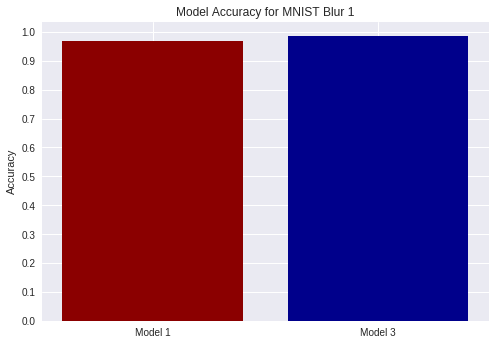

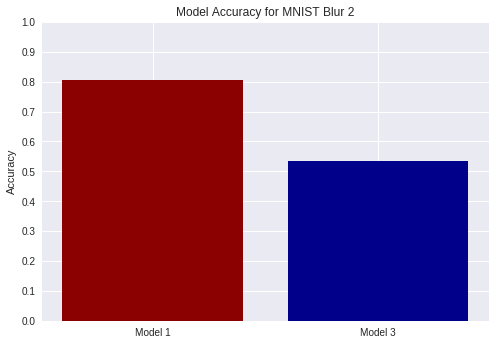

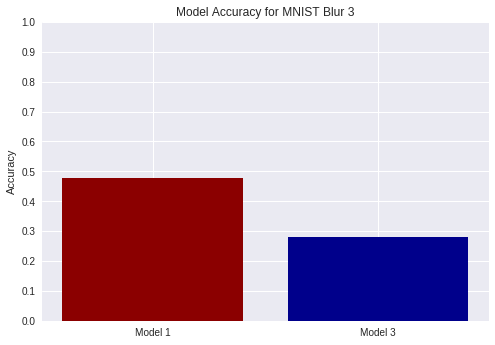

In [ ]:
# Plot accuracy of model 1 and model 3 on all levels of the blurred MNIST test data
# Plot accuracy of model 1 and model 3 on all levels of the noisy MNIST test data

# blur level 1
ind = np.arange(2)    # the x locations for the groups
width = 0.5       # the width of the bars: can also be len(x) sequence

accuracies = (test_acc_model1_MNIST_blur1, test_acc_model3_MNIST_blur1)
plt.bar(ind, accuracies,color=['darkred', 'darkblue'])
plt.ylabel('Accuracy')
plt.title('Model Accuracy for MNIST Blur 1')
plt.xticks(ind, ('Model 1', 'Model 3'))
plt.yticks(np.arange(0, 1.10, 0.10))

plt.show()

# blur level 2
ind = np.arange(2)    # the x locations for the groups
width = 0.5       # the width of the bars: can also be len(x) sequence

accuracies = (test_acc_model1_MNIST_blur2, test_acc_model3_MNIST_blur2)
plt.bar(ind, accuracies,color=['darkred', 'darkblue'])
plt.ylabel('Accuracy')
plt.title('Model Accuracy for MNIST Blur 2')
plt.xticks(ind, ('Model 1', 'Model 3'))
plt.yticks(np.arange(0, 1.10, 0.10))

plt.show()

# blur level 3
ind = np.arange(2)    # the x locations for the groups
width = 0.5       # the width of the bars: can also be len(x) sequence

accuracies = (test_acc_model1_MNIST_blur3, test_acc_model3_MNIST_blur3)
plt.bar(ind, accuracies,color=['darkred', 'darkblue']
       )
plt.ylabel('Accuracy')
plt.title('Model Accuracy for MNIST Blur 3')
plt.xticks(ind, ('Model 1', 'Model 3'))
plt.yticks(np.arange(0, 1.10, 0.10))

plt.show()

**Figure 3.** Accuracy of the simple and better complex model on blurred MNIST data.